In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from PIL import Image

import myTestingPlot as myPlotT
import myDatasetPlot as myPlotD
import myDatasetParse as myParse
import myWriteFile as myWrite

## Parse datasets

In [2]:
tmp1, tmp2 = myParse.loadDataFromTxt('augmented_vowels')

# Shuffle the matrix of all letters
vowels_data = np.zeros(tmp1.shape)
vowels_label = np.empty(tmp2.shape, dtype=str) 

index_ary = list(range(0, tmp1.shape[0]))
index_ary = random.sample(index_ary, len(index_ary)) 

for i in range(0, tmp1.shape[0]):
    vowels_data[i,:] = tmp1[index_ary[i],:]
    vowels_label[i]  = tmp2[index_ary[i]]
    
# Separate in 60% and 40% for training the TF model and the OL model
sep = int((vowels_data.shape[0])*0.16)

print('\n**** OL data')
OL_data  = vowels_data[:sep, :]
OL_label = vowels_label[:sep]
OL_data_train_vow, OL_label_train_vow, OL_data_test_vow, OL_label_test_vow = myParse.parseTrainValid(OL_data, OL_label)


print('\n**** TF data')
TF_data  = vowels_data[sep:, :]
TF_label = vowels_label[sep:]
TF_data_train, TF_label_train, TF_data_test, TF_label_test = myParse.parseTrainValid(TF_data, TF_label)


******* Dataset for letter ['A' 'E' 'I' 'O' 'U']

Raw shape        -> (180000, 5)
Columns          -> ['acquisition', 'letter', 'ax', 'ay', 'az']

Tot samples      -> 900
1 Sample is long -> 200


**** OL data

*** Separate train-valid

Train data shape  -> (101, 600)
Train label shape -> (101,)

Test data shape   -> (42, 600)
Test label shape  -> (42,)

**** TF data

*** Separate train-valid

Train data shape  -> (529, 600)
Train label shape -> (529,)

Test data shape   -> (226, 600)
Test label shape  -> (226,)


In [3]:
B_data, B_label = myParse.loadDataFromTxt('B_dataset')
B_train_data, B_train_label, B_test_data, B_test_label = myParse.parseTrainValid(B_data, B_label)

******* Dataset for letter ['B']

Raw shape        -> (29400, 5)
Columns          -> ['acquisition', 'letter', 'ax', 'ay', 'az']

Tot samples      -> 147
1 Sample is long -> 200


*** Separate train-valid

Train data shape  -> (102, 600)
Train label shape -> (102,)

Test data shape   -> (43, 600)
Test label shape  -> (43,)


In [4]:
M_data, M_label = myParse.loadDataFromTxt('M_dataset')
M_train_data, M_train_label, M_test_data, M_test_label = myParse.parseTrainValid(M_data, M_label)

******* Dataset for letter ['M']

Raw shape        -> (29000, 5)
Columns          -> ['acquisition', 'letter', 'ax', 'ay', 'az']

Tot samples      -> 145
1 Sample is long -> 200


*** Separate train-valid

Train data shape  -> (101, 600)
Train label shape -> (101,)

Test data shape   -> (42, 600)
Test label shape  -> (42,)


In [5]:
R_data, R_label = myParse.loadDataFromTxt('R_dataset')
R_train_data, R_train_label, R_test_data, R_test_label = myParse.parseTrainValid(R_data, R_label)

******* Dataset for letter ['R']

Raw shape        -> (29000, 5)
Columns          -> ['acquisition', 'letter', 'ax', 'ay', 'az']

Tot samples      -> 145
1 Sample is long -> 200


*** Separate train-valid

Train data shape  -> (101, 600)
Train label shape -> (101,)

Test data shape   -> (42, 600)
Test label shape  -> (42,)


###  Dataset of all letters

In [6]:
# Create a matrix that contains all the train data

order_data_all = OL_data_train_vow
order_data_all = np.vstack(( order_data_all, B_train_data))
order_data_all = np.vstack(( order_data_all, R_train_data))
order_data_all = np.vstack(( order_data_all, M_train_data))

order_label_all = OL_label_train_vow
order_label_all = np.hstack(( order_label_all, B_train_label))
order_label_all = np.hstack(( order_label_all, R_train_label))
order_label_all = np.hstack(( order_label_all, M_train_label))

print('\nNew dataset of ordered data has shape ' + str(order_data_all.shape))
print('New dataset of ordered label has shape' + str(order_label_all.shape))


New dataset of ordered data has shape (405, 600)
New dataset of ordered label has shape(405,)


In [7]:
# Shuffle the matrix of all letters
mixed_data_all = np.zeros(order_data_all.shape)
mixed_label_all = np.empty(order_label_all.shape, dtype=str) 

index_ary = list(range(0, order_data_all.shape[0]))
index_ary = random.sample(index_ary, len(index_ary)) 

for i in range(0, order_data_all.shape[0]):
    mixed_data_all[i,:] = order_data_all[index_ary[i],:]
    mixed_label_all[i]  = order_label_all[index_ary[i]]

###  Dataset of only new letters

In [8]:
# Create a matrix that contains all the train data

order_data_new = B_train_data
order_data_new = np.vstack(( order_data_new, R_train_data))
order_data_new = np.vstack(( order_data_new, M_train_data))

order_label_new = B_train_label
order_label_new = np.hstack(( order_label_new, R_train_label))
order_label_new = np.hstack(( order_label_new, M_train_label))

print('\nNew dataset of mixed data has shape ' + str(order_data_new.shape))
print('New dataset of mixed label has shape' + str(order_label_new.shape))


New dataset of mixed data has shape (304, 600)
New dataset of mixed label has shape(304,)


In [9]:
# Shuffle the matrix of all letters
mixed_data_new = np.zeros(order_data_new.shape)
mixed_label_new = np.empty(order_label_new.shape, dtype=str) 

index_ary = list(range(0, order_data_new.shape[0]))
index_ary = random.sample(index_ary, len(index_ary)) 

for i in range(0, order_data_new.shape[0]):
    mixed_data_new[i,:] = order_data_new[index_ary[i],:]
    mixed_label_new[i]  = order_label_new[index_ary[i]]

In [10]:
class Data_Container(object):
    def __init__(self):

        self.R_test_data       = R_test_data
        self.R_test_label      = R_test_label
        self.B_test_data       = B_test_data
        self.B_test_label      = B_test_label
        self.M_test_data       = M_test_data
        self.M_test_label      = M_test_label
        self.R_test_data       = R_test_data
        self.OL_data_test_vow  = OL_data_test_vow
        self.OL_label_test_vow = OL_label_test_vow
        
OL_testing_data = Data_Container()

## Define ML model

In [11]:
def lettToSoft(ary, labels):
    ret_ary = np.zeros([len(ary), len(labels)])
    
    for i in range(0, len(ary)):
        for j in range(0, len(labels)):
            if(ary[i]==labels[j]):
                ret_ary[i,j] = 1

            
    return ret_ary   

In [56]:
# Basic parameters
optimizer = 'Adam'
loss    = 'categorical_crossentropy'
metrics = ['accuracy']
vowels = ['A', 'E', 'I', 'O', 'U']

epochs = 2         # 20
batch_size = 64    # 16

In [57]:
# Model structure

# Buoni risultati con 3 layer da 300

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape =(TF_data_train.shape[1],),name='input_layer'))
#model.add(Dense(128, activation = 'relu', name='hidden1'))
model.add(Dense(300, activation = 'relu', name='hidden2'))
model.add(Dense(5, activation='softmax' , name = 'output_layer'))

In [58]:
model.compile(optimizer= optimizer, loss=loss, metrics=metrics) #use sparse is each letter is an integer (es a->1 b->2 c->3 ..)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               76928     
_________________________________________________________________
hidden2 (Dense)              (None, 300)               38700     
_________________________________________________________________
output_layer (Dense)         (None, 5)                 1505      
Total params: 117,133
Trainable params: 117,133
Non-trainable params: 0
_________________________________________________________________


### Train

In [59]:
# Perform training
train_hist = model.fit(TF_data_train, lettToSoft(TF_label_train, vowels), epochs=epochs, batch_size=batch_size, validation_split=0.2 , verbose=2)
print('\nEvaluation:')
results = model.evaluate(TF_data_test, lettToSoft(TF_label_test, vowels), verbose=2)

Epoch 1/2
7/7 - 0s - loss: 363.7159 - accuracy: 0.4019 - val_loss: 105.5826 - val_accuracy: 0.5660
Epoch 2/2
7/7 - 0s - loss: 66.9968 - accuracy: 0.6809 - val_loss: 40.9305 - val_accuracy: 0.7075

Evaluation:
8/8 - 0s - loss: 32.0816 - accuracy: 0.7788


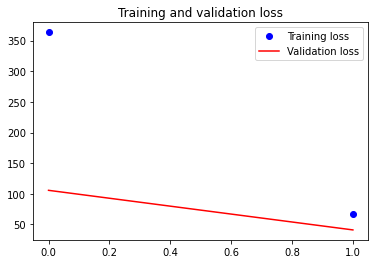

In [60]:
hist_loss = train_hist.history['loss']
hist_val_loss = train_hist.history['val_loss']
epoch_list = list(range(epochs))
plt.figure(1)
plt.plot(epoch_list, hist_loss, 'bo', label='Training loss')
plt.plot(epoch_list, hist_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Test on random vowel

In [61]:
rand_n = int(random.uniform(0, TF_data_test.shape[0]))
sample_data = TF_data_test[rand_n,:].reshape(1,TF_data_test.shape[1])
sample_label = TF_label_test[rand_n]

pred = model.predict(sample_data)
print(f'True       -> {sample_label}')
print(f'Prediction -> {vowels[np.argmax(pred)]}' )

True       -> E
Prediction -> E


### Plot performance of model

In [62]:
#myPlotT.plotTest(TF_data_test, TF_label_test, model, vowels)

### Save model

In [63]:
def saveParams(SAVE_MODEL_PATH, model):
    
    new_file = open(SAVE_MODEL_PATH + '/params.txt', "w")

    new_file.write("PARAMETERS SAVED FROM THE TRAINING")
    new_file.write("\n Batch size: " + str(batch_size))
    new_file.write("\n Epochs: " + str(epochs))
    new_file.write("\n Validation split: " + str(0.2))
    new_file.write("\n Metrics: " + str(metrics))
    new_file.write("\n Optimizer: " + optimizer)
    new_file.write("\n Loss: " + loss + "\n\n")

    model.summary(print_fn=lambda x: new_file.write(x + '\n'))

In [64]:
SAVE_MODEL_PATH = "C:/Users/massi/UNI/Magistrale/Anno 5/Semestre 2/Tesi/Code/Python/Saved_models/model/"
model.save(SAVE_MODEL_PATH + "model.h5")
saveParams(SAVE_MODEL_PATH, model)

#  ------------------------------------------------------------------------

# TinyOL

### Functions

In [65]:
class Custom_Layer(object):
    def __init__(self, model):

        self.ML_frozen = keras.models.Sequential(model.layers[:-1])
        self.ML_frozen.compile()
        self.W = np.array(model.layers[-1].get_weights()[0])
        self.b = np.array(model.layers[-1].get_weights()[1])
        self.label = ['A', 'E', 'I', 'O', 'U']
        
        self.width = self.W.shape[0]

    def predict(self, x):
        mat_prod = np.matmul(x, self.W) + self.b
        return tf.nn.softmax(mat_prod)      

In [66]:
def checkNewClass(model, y_true, y_true_soft, i, gauss):
    
    # Check if letter is new
    found = 0
    for k in range(0, len(model.label)):
        if (y_true[i] == model.label[k]):
            found = 1

    # If first time seeing this letter
    if (found == 0):

        model.label.append(y_true[i])   # Add new letter to label
        print(f'\n\n    New letter detected -> letter \033[1m{y_true[i]}\033[0m \n')
    
        if(gauss==0):
            model.W = np.hstack((model.W, np.zeros([model.width,1])))
            model.b = np.hstack((model.b, np.zeros([1])))
        elif(gauss==1):
            gaussW = np.zeros([model.width,1])
            for i in range(0,model.width):
                gaussW[i,0] = random.gauss(0, 0.01)
            gaussB = random.gauss(0, 0.01)
            model.W = np.hstack((model.W, gaussW))
            model.b = np.hstack((model.b, gaussB))
        elif(gauss==2):  # sporcariaper far funzionare LWF
            model.W = np.hstack((model.W, np.zeros([model.width,1])))
            model.b = np.hstack((model.b, np.zeros([1])))
            
                   
        print(f'    Now W is -> {model.W.shape}              and b is -> {model.b.shape}\n\n')

        y_true_soft = lettToSoft(y_true, model.label)
                
    return y_true_soft

### OL

In [67]:
def trainOneEpoch_OL(model, x, y_true, learn_rate):
    
    print('**********************************\nPerforming training with OL METHOD - STOCHASTICH\n')
   
    cntr=1
    tot_samples = x.shape[0]
    
    y_true_soft = lettToSoft(y_true, model.label)  # Transform the true label letters in softmax
        
    # Cycle over all samples
    for i in range(0, tot_samples):
        
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 0)   # Check if letter is new
        
        # PPREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])        
          
        # BACKPROPAGATION
        cost = y_pred-y_true_soft[i,:]

        for j in range(0,model.W.shape[0]):
            # Update weights
            deltaW = np.multiply(cost, y_ML[0,j])
            dW = np.multiply(deltaW, learn_rate)
            model.W[j,:] = model.W[j,:]-dW

        # Update biases
        db = np.multiply(cost, learn_rate)
        model.b = model.b-db
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

In [68]:
def trainOneEpoch_OL_miniBatch(model, x, y_true, learn_rate, batch_size):
    
    print('**********************************\nPerforming training with OL METHOD - MINI BATCH\n')
    
    cntr=1
    tot_samples = x.shape[0]
    sum_gradW = np.zeros([model.W.shape[0], 8])
    sum_gradB = np.zeros([1, 8])
    
    y_true_soft = lettToSoft(y_true, model.label)     # Transform the true label letters in softmax array
        
    # Cycle over all samples
    for i in range(0, tot_samples):
        
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 0)   # Check if letter is new
        
        h = model.W.shape[0]
        w = model.W.shape[1]
        
        if(i%batch_size==0):
                model.W = model.W - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,:w]
                model.b = model.b - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,:w]

                sum_gradW = np.zeros([h, 8])  #reset each batch  
                sum_gradB = np.zeros([1, 8])  #reset each batch   
        
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])

        # BACKPROPAGATION
        cost = y_pred-y_true_soft[i,:]

        for j in range(0,h): 
            # Update weights
            tmp = np.multiply(cost, y_ML[0,j]) 
            deltaW = np.zeros([1,8])
            deltaW[0,:w] = tmp  
            sum_gradW[j,:] += deltaW[0,:]

        # Update biases
        deltaB = np.zeros([1,8])
        deltaB[0,:w] = cost
        sum_gradB += deltaB

        # If last iteration
        if(i==tot_samples-1):
            model.W = model.W - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,:w]
            model.b = model.b - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,:w]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### OL v2

In [69]:
  def trainOneEpoch_OL_v2(model, x, y_true, learn_rate):
    
    print('**********************************\nPerforming training with CWR METHOD - STOCASTICH \n')
    
    cntr=1
    tot_samples = x.shape[0]
    
    y_true_soft = lettToSoft(y_true, model.label)    # Transform the true label letters in softmax
            
    # Cycle over every sample
    for i in range(0, tot_samples):
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 1)    # Check if letter is new
        
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])

        # BACKPROPAGATION
        cost = y_pred-y_true_soft[i,:]  

        for j in range(0,model.W.shape[0]):
            # Update weights
            deltaW = np.multiply(cost, y_ML[0,j])
            dW = np.multiply(deltaW, learn_rate)
            model.W[j,5:] = model.W[j,5:]-dW[5:]

        # Update biases
        db = np.multiply(cost, learn_rate)
        model.b[5:] = model.b[5:]-db[5:]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

In [70]:
def trainOneEpoch_OL_v2_miniBatch(model, x, y_true, learn_rate, batch_size):
    
    print('**********************************\nPerforming training with CWR - MINI BATCH \n ')  

    cntr=1
    tot_samples = x.shape[0]
    sum_gradW = np.zeros([model.W.shape[0], 8])
    sum_gradB = np.zeros([1, 8])
    
    # Transform the true label letters in softmax array
    y_true_soft = lettToSoft(y_true, model.label)
           
    # Cycle over all input samples
    for i in range(0, tot_samples):
        
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 0) # Check if letter is new
        
        h = model.W.shape[0]
        w = model.W.shape[1]
        
        # If beginning of batch
        if(i%batch_size==0):
                model.W[:,5:] = model.W[:,5:] - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,5:w]
                model.b[5:]   = model.b[5:]   - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,5:w]
                sum_gradW = np.zeros([h, 8])  # reset
                sum_gradB = np.zeros([1, 8])  # reset
            
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])

        # BACKPROPAGATION
        cost = y_pred-y_true_soft[i,:]

        for j in range(0,h):  
            # Update weights
            tmp = np.multiply(cost, y_ML[0,j]) 
            deltaW = np.zeros([1,8])
            deltaW[0,:tmp.shape[0]] = tmp  
            sum_gradW[j,:] += deltaW[0,:]

        # Update biases
        deltaB = np.zeros([1,8])
        deltaB[0,:cost.shape[0]] = cost
        sum_gradB += deltaB

        # If last iteration
        if(i==tot_samples-1):
            model.W[:,5:] = model.W[:,5:] - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h,5:w]
            model.b[5:]   = model.b[5:]   - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,5:w]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### LWF

In [71]:
def trainOneEpochOL_LWF(model, x, y_true, learn_rate):
    
    print('**********************************')
    print('Performing training with OL METHOD - LWF')
    print()
    
    lam  = 0
    cntr = 1
    tot_samples = x.shape[0]
    y_LWF = np.zeros([tot_samples, 8])    # Define container for LWF

    # Perform nitial prediciton for LWF
    print('   Performing prediction of all dataset')
    for u in range(0, x.shape[0]):
        y_ML = model.ML_frozen.predict(x[u,:].reshape(1,x.shape[1]))
        y_LWF[u,:5] = model.predict(y_ML[0,:])
    
    
    y_true_soft = lettToSoft(y_true, model.label)    # Transform the true label letters in softmax
         
    # Cycle over every sample
    for i in range(0, tot_samples):
        
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 2)   # Check if letter is new
        
        w = model.W.shape[1]
        h = model.W.shape[0]
        if(w==6):
            lam = 2/3
        elif(w==7):
            lam = 3/4
        elif(w==8):
            lam = 4/5
            
             
        # PREDICTION
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = model.predict(y_ML[0,:])
      
        
        # BACKPROPAGATION        
        cost_norm = y_pred-y_true_soft[i,:]
        cost_LWF  = y_pred-y_LWF[i,:w]

        for j in range(0,h):
            # Update weights
            deltaW_norm = np.multiply(cost_norm,1-lam)
            deltaW_LWF  = np.multiply(cost_LWF, lam)
            deltaW      = np.multiply(deltaW_norm+deltaW_LWF, y_ML[0,j])
            dW          = np.multiply(deltaW, learn_rate)

            model.W[j,:] = model.W[j,:]-dW

            # Update biases
            db_norm = np.multiply(cost_norm, 1-lam)
            db_LWF  = np.multiply(cost_LWF, lam)
            db      = np.multiply(db_norm+db_LWF, learn_rate)
            model.b = model.b-db
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

In [72]:
def trainOneEpochOL_LWF_v2(model, x, y_true, learn_rate, batch_size):
    
    print('**********************************\nPerforming training with OL METHOD - LWF with MINI BATCH\n')
    
    lam  = 0
    cntr = 1
    tot_samples = x.shape[0]
    # Transform the true label letters in softmax array
    y_true_soft = lettToSoft(y_true, model.label)
        
        
    # Initialize now and then reset it once every batch_size
    sum_gradW = np.zeros([model.W.shape[0], 8])
    sum_gradB = np.zeros([1, 8])
    
    # Define a matrix that I can then fill with the initial inference
    y_LWF = np.zeros([ x.shape[0], 8])
    
    # For every sample in the dataset given
    for i in range(0, tot_samples):
        
        
        # Check if letter is new
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 0)
        
        h = model.W.shape[0]
        w = model.W.shape[1]
        if(w==6):
            lam = 2/3
        elif(w==7):
            lam = 3/4
        elif(w==8):
            lam = 4/5
        
        # Reset the matrices that keep track of the summation of gradient
        if(i%batch_size==0):
                model.W = model.W - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h, :w]
                model.b = model.b - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,:w]
            
                sum_gradW = np.zeros([h, 8])
                sum_gradB = np.zeros([1, 8])
                
                # Value that avoids the last prediction of LWF to be outside of dataset dimension
                limit = 0
                if(i+batch_size > tot_samples):
                    limit = i+batch_size-tot_samples
                    
                
                for k in range(0, batch_size-limit):
                    # Prediction from ML frozen model
                    y_ML = model.ML_frozen.predict(x[i+k,:].reshape(1,x.shape[1]))
                    # Prediction from LWF 
                    y_LWF[k,:w] = model.predict(y_ML[0,:])
      
        # Prediction from ML frozen model
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        # Prediction from TinyOL layer
        y_pred = model.predict(y_ML[0,:])
         
        # ---- BACKPROPAGATION | MINI BATCH + LWF
        cost_norm = y_pred-y_true_soft[i,:]
        cost_LWF  = y_pred-y_LWF[i,:w]

        

        for j in range(0,h):  # da 0 a 300

            # Update weights
            tmp_norm     = np.multiply(cost_norm, 1-lam)
            tmp_LWF      = np.multiply(cost_LWF,  lam)
            if(len(tmp_LWF)>5):
                tmp_LWF[5] = 0
            elif(len(tmp_LWF)>6):
                tmp_LWF[6] = 0
            elif(len(tmp_LWF)>7):
                tmp_LWF[7] = 0
            tmp_tot      = np.multiply(tmp_norm+tmp_LWF, y_ML[0,j])
            deltaW       = deltaW = np.zeros([1,8])
            deltaW[0,:w] = tmp_tot 
            
            sum_gradW[j,:] += deltaW[0,:]            
            


            # Update biases
            db_norm = np.multiply(cost_norm, 1-lam)
            db_LWF  = np.multiply(cost_LWF,  lam)    
            deltaB = np.zeros([1,8])
            deltaB[0,:w] = db_norm+db_LWF
            
            sum_gradB += deltaB
            
        # if is last iteration , update the matrix
        if(i==tot_samples-1):
            model.W = model.W - np.multiply(sum_gradW, 1/batch_size*learn_rate)[:h, :w]
            model.b = model.b - np.multiply(sum_gradB, 1/batch_size*learn_rate)[0,:w]
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1

### CWR

In [73]:
def trainOneEpoch_CWR(model, x, y_true, learn_rate, batch_size):
        
    print('**********************************\nPerforming training CWR \n ')  

    cntr=1
    tot_samples = x.shape[0]
    TW = np.zeros([model.W.shape[0], 8])
    TB = np.zeros([1, 8])
    found_lett = np.zeros([1,8])
    
    y_true_soft = lettToSoft(y_true, model.label)    # Transform the true label letters in softmax array
           
    # Cycle over all input samples
    for i in range(0, tot_samples):
        
        y_true_soft = checkNewClass(model, y_true, y_true_soft, i, 0) # Check if letter is new
        
        h = model.W.shape[0]
        w = model.W.shape[1]
        
        dummy = 0
        
        # If beginning of batch
        if(i%batch_size==0 and i!=0): 
            for k in range(0, w):
                if(found_lett[0,k]==0):
                    dummy = 0
                    #model.W[:,k] = np.copy(TW[:,k])
                    #model.b[k]   = np.copy(TB[0,k])
                else:
                    tempW = np.multiply(model.W[:,k], found_lett[0,k])
                    tempB = np.multiply(model.b[k], found_lett[0,k])
                    model.W[:,k] = np.multiply(tempW+TW[:,k], 1/(found_lett[0,k]+1))
                    model.b[k]   = np.multiply(tempB+TB[0,k], 1/(found_lett[0,k]+1))
                    
            TW[:h,:w] = model.W
            TB[0,:w] = model.b
            found_lett = np.zeros([1,8])  # reset
        elif(i==0):
            TW = np.zeros([h, 8])   # reset  
            TB = np.zeros([1, 8])   # reset     
                
        found_lett[0,np.argmax(y_true_soft[i,:])] += 1  # update the letter counter
            
        # PREDICTION ON THE MATRIX TW AND TB
        y_ML = model.ML_frozen.predict(x[i,:].reshape(1,x.shape[1]))
        y_pred = tf.nn.softmax(np.matmul(y_ML, TW) + TB)

        # BACKPROPAGATION
        cost = y_pred[0,:w]-y_true_soft[i,:]

        for j in range(0,h):  # da 0 a 300
            deltaW = np.multiply(cost, y_ML[0,j])
            dW = np.multiply(deltaW, learn_rate)
            TW[j,:w] = TW[j,:w] - dW

        # Update biases
        db = np.multiply(cost, learn_rate)
        TB[0,:w] = TB[0,:w]-db

        # If last iteration
        if(i==tot_samples-1):
            for k in range(5, w):
                if(found_lett[0,k]==0):
                    dummy = 0
                    #model.W[:,k] = np.copy(TW[:,k])
                    #model.b[k]   = np.copy(TB[0,k])
                else:
                    tempW = np.multiply(model.W[:,k], found_lett[0,k])
                    tempB = np.multiply(model.b[k], found_lett[0,k])
                    model.W[:,k] = np.multiply(tempW+TW[:,k], 1/(found_lett[0,k]+1))
                    model.b[k]   = np.multiply(tempB+TB[0,k], 1/(found_lett[0,k]+1))
        
        print(f"\r    Currently at {np.round(np.round(cntr/x.shape[0],4)*100,2)}% of dataset", end="")
        cntr +=1
        

### Create ML model (cut model)

In [74]:
ML_model = keras.models.Sequential(model.layers[:-1])
ML_model.summary()
ML_model.compile()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               76928     
_________________________________________________________________
hidden2 (Dense)              (None, 300)               38700     
Total params: 115,628
Trainable params: 115,628
Non-trainable params: 0
_________________________________________________________________


In [75]:
SAVE_MODEL_CUT_PATH = "C:/Users/massi/UNI/Magistrale/Anno 5/Semestre 2/Tesi/Code/Python/Saved_models/Frozen_model/"
ML_model.save(SAVE_MODEL_CUT_PATH + "model.h5")
saveParams(SAVE_MODEL_CUT_PATH, ML_model)

# Trainings

In [76]:
num_epochs = 1
learn_rate = 0.001
lam = 0.4
batch_size_new = 10

In [77]:
# DEFINE WHICH TRAINING AND PLOTS TO SHOW

KERAS      = 1
OL_vowels  = 0
OL         = 0
OL_mini    = 0
LWF        = 0
LWF_mini   = 0
OL_v2      = 0
OL_v2_mini = 0
CWR        = 1

### Train with OL only on vowels

In [78]:
if(OL_vowels==1):
    Model_OL_vowels = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpoch_OL(Model_OL_vowels, OL_data_train_vow, OL_label_train_vow, learn_rate)

### Train with OL method

In [79]:
if(OL==1):
    Model_OL_all_mixed = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpoch_OL(Model_OL_all_mixed, mixed_data_all, mixed_label_all, 0.001)

### Train with OL + mini batch

In [80]:
if(OL_mini==1):
    Model_OL_mini = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpoch_OL_miniBatch(Model_OL_mini, mixed_data_all, mixed_label_all, 0.001, batch_size_new)

### Train with LWF

In [81]:
if(LWF==1):
    Model_LWF_1 = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpochOL_LWF(Model_LWF_1, mixed_data_all, mixed_label_all, learn_rate)   

### Train LWF + mini batches

In [82]:
if(LWF_mini==1):
    Model_LWF_2 = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpochOL_LWF_v2(Model_LWF_2, mixed_data_all, mixed_label_all, learn_rate, batch_size_new)

### Train with OL v2 

In [83]:
if(OL_v2==1):
    Model_OL_v2 = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpoch_OL_v2(Model_OL_v2, mixed_data_all, mixed_label_all, learn_rate)

### Train with OL v2 + mini batch

In [84]:
if(OL_v2_mini==1):
    Model_OL_v2_miniBatch = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpoch_OL_v2_miniBatch(Model_OL_v2_miniBatch, mixed_data_all, mixed_label_all, learn_rate, batch_size_new)

### Train with CWR

In [85]:
if(CWR==1):
    Model_CWR = Custom_Layer(model)
    for i in range(0, num_epochs):
        trainOneEpoch_CWR(Model_CWR, OL_data_train_vow, OL_label_train_vow, 0.00005, 10)
        # GOOD l rate 0.00005  - batch size 10

**********************************
Performing training CWR 
 
    Currently at 100.0% of dataset

# SIMULATION PLOTS

### Original model

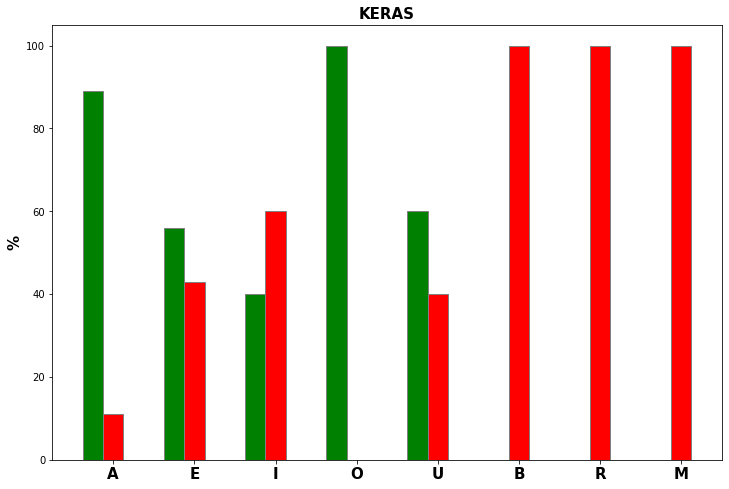

In [86]:
if(KERAS==1):
    res00, res01, res02 = myPlotT.testOL_v2(model, OL_testing_data)
    myPlotT.plotTestOL(res00, res01, res02, 'KERAS', 'origModel')

### Only vowels

In [87]:
if(OL_vowels==1):
    res10, res11, res12 = myPlotT.testOL(Model_OL_vowels, OL_testing_data)
    myPlotT.plotTestOL(res10, res11, res12, 'VOWELS', 'trainVowels')

### OL

In [88]:
if(OL==1):
    res20, res21, res22 = myPlotT.testOL(Model_OL_all_mixed, OL_testing_data)
    myPlotT.plotTestOL(res20, res21, res22, 'OL', 'trainOL')

### OL + mini batch

In [89]:
if(OL_mini==1):
    res30, res31, res32 = myPlotT.testOL(Model_OL_mini, OL_testing_data)
    myPlotT.plotTestOL(res30, res31, res32, 'OL + mini batch', 'trainOL_mini')

### LWF

In [90]:
if(LWF==1):
    res40, res41, res42 = myPlotT.testOL(Model_LWF_1, OL_testing_data)
    myPlotT.plotTestOL(res40, res41, res42, 'LWF', 'trainLWF_v1')

### LWF + mini batch

In [91]:
if(LWF_mini==1):
    res50, res51, res52 = myPlotT.testOL(Model_LWF_2, OL_testing_data)
    myPlotT.plotTestOL(res50, res51, res52, 'LWF + mini batch', 'trainLWF_v2')

### OL v2

In [92]:
if(OL_v2==1):
    res60, res61, res62 = myPlotT.testOL(Model_OL_v2, OL_testing_data)
    myPlotT.plotTestOL(res60, res61, res62, 'OL v2', 'trainOL_v2')

### OL v2 + mini batch

In [93]:
if(OL_v2_mini==1):
    res70, res71, res72 = myPlotT.testOL(Model_OL_v2_miniBatch, OL_testing_data)
    myPlotT.plotTestOL(res70, res71, res72, 'OL v2 + mini batch', 'trainOL_v2_mini')

### CWR

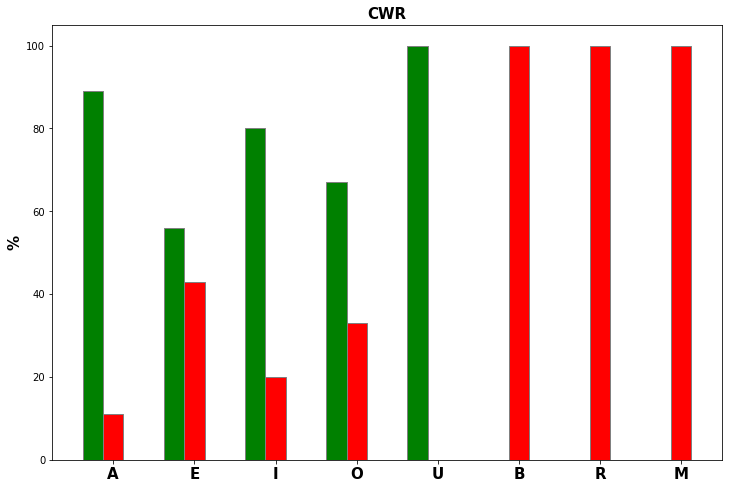

In [94]:
if(CWR==1):
    res80, res81, res82 = myPlotT.testOL(Model_CWR, OL_testing_data)
    myPlotT.plotTestOL(res80, res81, res82, 'CWR', 'trainCWR')

## All plots

In [95]:
#myPlotT.plotAllTEst()

In [52]:
print('In this simulation the best trained model is:')
print(f'ORIG:         {round(np.sum(res00)/np.sum(res02),4)*100}')
if(OL_vowels==1):
    print(f'VOWELS:       {round(np.sum(res10)/np.sum(res12),4)*100}')
if(OL==1):
    print(f'OL:           {round(np.sum(res20)/np.sum(res22),4)*100}')
if(OL_mini==1):
    print(f'OL + mini:    {round(np.sum(res30)/np.sum(res32),4)*100}')
if(LWF==1):
    print(f'LWF:          {round(np.sum(res40)/np.sum(res42),4)*100}')
if(LWF_mini==1):
    print(f'LWF + mini:   {round(np.sum(res50)/np.sum(res52),4)*100}')
if(OL_v2==1):
    print(f'OL v2:        {round(np.sum(res60)/np.sum(res62),4)*100}')
if(OL_v2_mini==1):
    print(f'OL v2 + mini: {round(np.sum(res70)/np.sum(res72),4)*100}')
if(CWR==1):
    print(f'CWR: {round(np.sum(res80)/np.sum(res82),4)*100}')

In this simulation the best trained model is:
ORIG:         21.3
CWR: 21.3


# GENERAL PLOTS

In [53]:
# Write down in txt files all the results across 10 or so simulations          
WRITE_SIMU_RES = 0
                
if(WRITE_SIMU_RES==1):
    myWrite.writeSimuRes('orig',      res00, res01, res02)
    myWrite.writeSimuRes('vowels',    res10, res11, res12)
    myWrite.writeSimuRes('OL',        res20, res21, res22)
    myWrite.writeSimuRes('OL_mini',   res30, res31, res32)
    myWrite.writeSimuRes('LWF',       res40, res41, res42)
    myWrite.writeSimuRes('LWF_mini',  res50, res51, res52)
    myWrite.writeSimuRes('OL_v2',     res60, res61, res62)
    myWrite.writeSimuRes('OL_v2_min', res70, res71, res72)
    myWrite.writeSimuRes('CWR',       res80, res81, res82)

Average accuracy for orig is: 22.51
Average accuracy for vowels is: 17.39
Average accuracy for OL is: 71.43
Average accuracy for OL_mini is: 72.84
Average accuracy for LWF is: 30.43
Average accuracy for LWF_mini is: 37.11
Average accuracy for OL_v2 is: 72.92
Average accuracy for OL_v2_min is: 74.11
Average accuracy for CWR is: 76.98


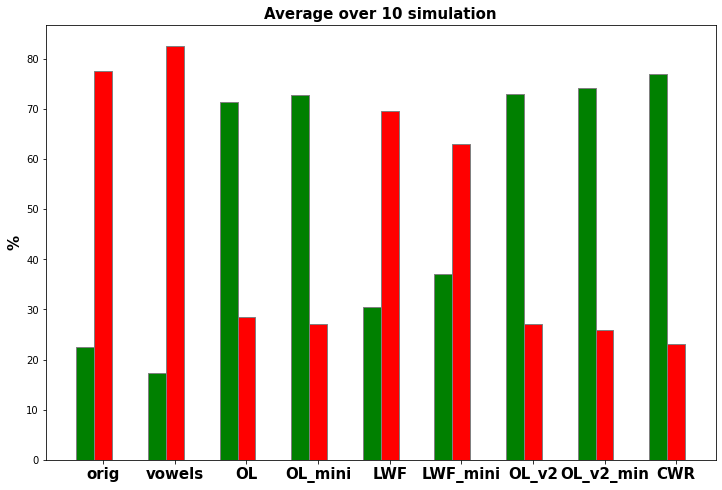

In [54]:
ENABLE_PLOTS = 0
myPlotD.plotSimuRes(1)
if(ENABLE_PLOTS==1):



    myPlotD.plotDatasetStructure(TF_data_train,TF_data_test,
                                 OL_data_train_vow,OL_data_test_vow,
                                 B_train_data,B_test_data,
                                 R_train_data,R_test_data,
                                 M_train_data,M_test_data)

    myPlotD.plotDatasetOL(OL_data_train_vow,OL_data_test_vow,
                          B_train_data,B_test_data,
                          R_train_data,R_test_data,
                          M_train_data,M_test_data)

    myPlotD.plotDatasetTF(TF_data_train,TF_data_test)














### ----------------------------------------------------------------------------------------------------------

# Scripts for generating libraries for the STM code

In [55]:
WRITE_STM_FILES = 0

if(WRITE_STM_FILES==1):
    myWrite.writeSampleB()
    myWrite.writeSampleMix()
    myWrite.writeSampleVowels()
    
myWrite.writeLastLayer(model)
